# Representing qubit state

[Введение](https://qiskit.org/textbook/ch-states/introduction.html)

[Понятние state vector](https://qiskit.org/textbook/ch-states/representing-qubit-states.html)

Вектор состояния кубита выражается через суперпозицию векторов состаяния $|0⟩$ и $|1⟩$:
$$q = \alpha|0⟩ + \alpha|1⟩ $$, 
где $|0⟩$ - вектор состояния 0: $|0⟩  = [1,0]$ (нулевая позиция в векторе - единица), $|1⟩  = [0,1]$ (первая позиция в векторе  - единица)


In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [11]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit


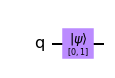

In [12]:
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw(output="mpl")  # Let's view our circuit

In [13]:
initial_state = [1,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw(output="mpl")  # Let's view our circuit

QiskitError: 'Sum of amplitudes-squared does not equal one.'

Запустим на симуляторе

In [14]:
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

In [22]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.save_statevector()   # Tell simulator to save statevector
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result

In [23]:
out_state = result.get_statevector()
print(out_state) # Display the output state vector

[0.+0.j 1.+0.j]


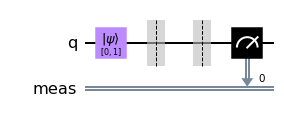

In [24]:
qc.measure_all()
qc.draw(output="mpl")

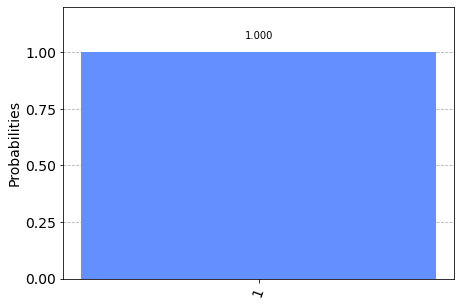

In [25]:
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

Кубит принимает значение единицы, что мы и ожидали, когда инициализировали его вектором $|1⟩$

Попробуем другой вектор:

In [26]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>

In [31]:
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc.save_statevector() # Save statevector
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
print(state)           # Print the result

[0.70710678+0.j         0.        +0.70710678j]


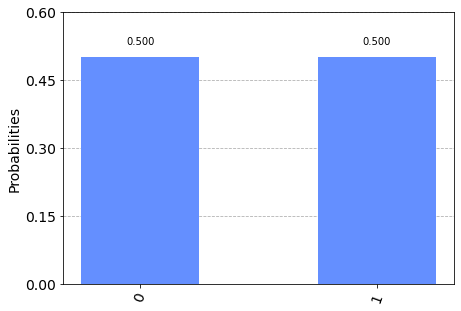

In [32]:
qobj = assemble(qc)
results = sim.run(qobj).result().get_counts()
plot_histogram(results)

Получается, мы можем прочитать кубит как 1 и как 0 с равной вероятностью

Как получить **вероятность** того, что кубит примет определённое состояние (вектор состояния) $|x⟩$?

Вероятность определяется по формуле:

$$
p(|x⟩) = |⟨x, \psi⟩| ^2
$$
где
* $|x⟩$ -  вектор столбец (ket)
* $⟨x|$ -  вектор строка (bra)
* ⟨a, b⟩ - скалярное произведение

Тогда чтобы рассчитать вероятность, что кубит примет состояние $|0⟩=[1,0]$\, если ветор состояния кубита равен: 
$$|q_0⟩ = \frac{1}{\sqrt{2}} |0⟩ + \frac{i}{\sqrt{2}}|1⟩$$

нужно рассчитать произведение:
$$
 |⟨0,q_0⟩| = \frac{1}{\sqrt{2}}⟨0|0⟩+ \frac{i}{\sqrt{2}}⟨0|1⟩ =  \frac{1}{\sqrt{2}}
$$ 
и возвести в квадрат: 
$$
(\frac{1}{\sqrt{2}})^2 = \frac{1}{2}
$$

Интересн, если бы мы взяли x=⟨1|, то вероятность бы получилась равной $-\frac{1}{2}$

Попрубем сделать вероятность "выпадения" единицы равной $\frac{1}{3}$

In [52]:
initial_state = [1/sqrt(3), sqrt(2)/sqrt(3)]  # Define state |q_0>
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc.save_statevector() # Save statevector
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
print(state)           # Print the result

[0.57735027+0.j 0.81649658+0.j]


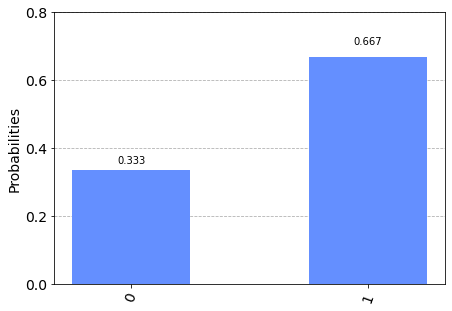

In [51]:
qobj = assemble(qc)
results = sim.run(qobj).result().get_counts()
plot_histogram(results)

In [47]:
(1j/sqrt(3))**2 + (sqrt(2)/sqrt(3))**2

(0.3333333333333334+0j)

**?** Совсем непонятно, для чего нам нужна мнимая $i$

# Сфера Блоха

От комплексных коэфиициентов вектора состояний $\alpha$, $\beta$ мы можем перейти к $\theta$ и $\phi$, которые будут давать сферические координаты и позволят изобразить вектор состояний на сфере Блоха

[Вывод](https://qiskit.org/textbook/ch-states/representing-qubit-states.html#3.-The-Bloch-Sphere-)